In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [4]:
from os.path import dirname
dirPath = dirname(os.getcwd())+"\TotalCleanedTest.csv"
dirPath

'c:\\Users\\David Fernandez\\Desktop\\cancerDataAnalysis\\Notebooks\\TotalCleanedTest.csv'

In [45]:
df = pd.read_csv(dirPath)
df.set_index('index', inplace=True)
df.head()

,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,ent_ocurr_nm,...,area_ur,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,edadCalc
index,,,,,,,,,,,,,,,,,,,,,
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,...,1,8,9,C23,Tumor maligno de la vesicula biliar,Gallbladder,C16,Los demas tumores malignos de organos digestivos,Stomach,57
1,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,...,1,2,9,C34,"Tumor maligno de los bronquios o del pulmon, p...",Lungs,C34,"Tumor maligno de la traquea, de los bronquios ...",Lungs,48
2,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,...,1,8,9,C53,"Tumor maligno del cuello del utero, sin otra e...",Cervix Uteri,C53,Tumor maligno del cuello del utero,Cervix Uteri,88
3,1,Aguascalientes,5,Jesus Maria,1,Aguascalientes,5,Jesus Maria,1,Aguascalientes,...,1,8,9,C34,"Tumor maligno de los bronquios o del pulmon, p...",Lungs,C34,"Tumor maligno de la traquea, de los bronquios ...",Lungs,74
4,1,Aguascalientes,8,San Jose de Gracia,1,Aguascalientes,8,San Jose de Gracia,1,Aguascalientes,...,2,8,9,C22,"Tumor maligno del higado, no especificado",Liver,C22,Tumor maligno del higado y de las vias biliare...,Liver,75


In [41]:
df.shape[0]

643968

In [44]:
index_names = df[((df['anio_ocur'] == 99) | (df['mes_ocurr'] == 99)| (df['dia_ocurr'] == 99))].index
df.drop(index_names, inplace = True) 
#index_names = df[((df['anio_nacim'] == 99) | (df['mes_nacim'] == 99)| (df['dia_nacim'] == 99))].index
#df.drop(index_names, inplace = True) 
df.shape[0]

569648

In [6]:
gdl = df.loc[df_re["ent_regis" == 14]]
gdl.head()

,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,ent_ocurr_nm,...,area_ur,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,edadCalc
index,,,,,,,,,,,,,,,,,,,,,
28123,14,Jalisco,7,San Juanito de Escobedo,14,Jalisco,7,San Juanito de Escobedo,14,Jalisco,...,1,8,2,C50,"Tumor maligno de la mama, parte no especificada",Breast,C50,Tumor maligno de la mama,Breast,85
28124,14,Jalisco,8,Arandas,14,Jalisco,8,Arandas,14,Jalisco,...,1,8,2,C20,"Tumor maligno del colon, parte no especificada",Colon and Rectum,C20,Tumor maligno del colon,Colon and Rectum,84
28125,14,Jalisco,13,Atotonilco el Alto,14,Jalisco,13,Atotonilco el Alto,14,Jalisco,...,1,8,2,C49,Tumor maligno del tejido conjuntivo y tejido b...,Soft Tissue,C49,Tumores malignos de los tejidos mesoteliales y...,Soft Tissue,58
28126,14,Jalisco,13,Atotonilco el Alto,14,Jalisco,13,Atotonilco el Alto,14,Jalisco,...,1,8,2,C44,"Tumor maligno de la piel, sitio no especificado",Skin non Melanoma,C44,Otros tumores malignos de la piel,Skin non Melanoma,90
28127,14,Jalisco,13,Atotonilco el Alto,14,Jalisco,13,Atotonilco el Alto,14,Jalisco,...,1,8,2,C20,"Tumor maligno del colon, parte no especificada",Colon and Rectum,C20,Tumor maligno del colon,Colon and Rectum,70


In [7]:
gdlRegCount = gdl['ent_regis'].value_counts().rename_axis('unique_values').reset_index(name='counts')
gdlRegCount

,unique_values,counts
0,14,45432


In [8]:
gdlResidCount = gdl['ent_resid'].value_counts().rename_axis('unique_values').reset_index(name='counts')
gdlResidCount

,unique_values,counts
0,14,43727
1,16,525
2,18,365
3,6,210
4,32,127
5,25,67
6,33,50
7,11,49
8,15,31
9,9,31


In [9]:
gdlOcurrCount = gdl['ent_ocurr'].value_counts().rename_axis('unique_values').reset_index(name='counts')
gdlOcurrCount

,unique_values,counts
0,14,45395
1,32,12
2,16,5
3,15,5
4,18,4
5,6,4
6,11,2
7,7,2
8,4,2
9,1,1


In [37]:
gdlNoResid = gdl.loc[gdl["ent_resid"] != 14]
cols=["anio_ocur","mes_ocurr","dia_ocurr"]
gdlNoResid['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
gdlNoResid['date_ocurr']=pd.to_datetime(gdlNoResid['date_ocurr'])
gdlNoResid.head()

<ipython-input-37-dac18d09216b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdlNoResid['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
<ipython-input-37-dac18d09216b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdlNoResid['date_ocurr']=pd.to_datetime(gdlNoResid['date_ocurr'])


,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,ent_ocurr_nm,...,complicaro,lengua,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,edadCalc,date_ocurr
index,,,,,,,,,,,,,,,,,,,,,
28142,14,Jalisco,27,Cuautitlan de Garcia Barragan,6,Colima,7,Manzanillo,14,Jalisco,...,2,2,C25,Tumor maligno de sitios no especificados,Pancreas,C999,Los demas tumores malignos de otros sitios y l...,Otros,34,2012-01-16
28153,14,Jalisco,39,Guadalajara,16,Michoacán de Ocampo,69,La Piedad,14,Jalisco,...,8,2,C22,Tumor maligno secundario del higado,Liver,C999,Los demas tumores malignos de otros sitios y l...,Otros,66,2012-01-02
28158,14,Jalisco,39,Guadalajara,15,México,58,Nezahualcoyotl,14,Jalisco,...,8,2,C22,"Tumor maligno del higado, no especificado",Liver,C22,Tumor maligno del higado y de las vias biliare...,Liver,82,2012-01-03
28189,14,Jalisco,39,Guadalajara,16,Michoacán de Ocampo,75,Los Reyes,14,Jalisco,...,8,2,C67,"Tumor maligno de la vejiga urinaria, parte no ...",Bladder,C67,Tumor maligno de la vejiga urinaria,Bladder,77,2012-01-14
28199,14,Jalisco,39,Guadalajara,3,Baja California Sur,3,La Paz,14,Jalisco,...,2,2,C16,"Tumor maligno del estomago, parte no especificada",Stomach,C16,Tumor maligno del estomago,Stomach,49,2012-01-16


In [38]:
gdlResid = gdl.loc[gdl["ent_resid"] == 14]
cols=["anio_ocur","mes_ocurr","dia_ocurr"]
gdlResid['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
gdlResid['date_ocurr']=pd.to_datetime(gdlResid['date_ocurr'])

<ipython-input-38-ee3934367946>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdlResid['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
<ipython-input-38-ee3934367946>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdlResid['date_ocurr']=pd.to_datetime(gdlResid['date_ocurr'])


(734503.0, 734869.0)

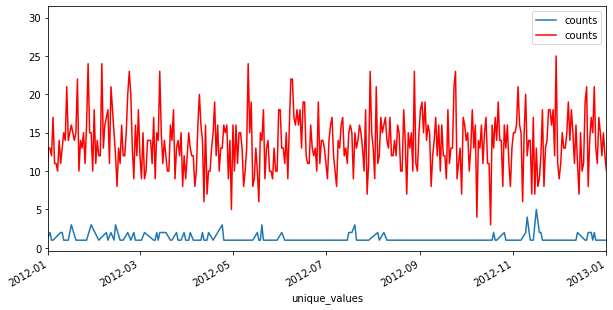

In [39]:
import datetime
fig, ax = plt.subplots(figsize=(10, 5))
yearCount = gdlNoResid['date_ocurr'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount.set_index('unique_values', inplace=True)
yearCount.reset_index().plot(x="unique_values", y='counts', ax=ax)
ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2013, 1, 1)])

yearCount2 = gdlResid['date_ocurr'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount2.set_index('unique_values', inplace=True)
yearCount2.reset_index().plot(x="unique_values", y='counts',c='red' ,ax=ax)
ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2013, 1, 1)])


In [71]:
yearCount = gdlNoResid['anio_ocur'].value_counts().rename_axis('unique_values').reset_index(name='counts')
#yearCount.set_index('unique_values', inplace=True)
yearCount

,unique_values,counts
0,2018,232
1,2017,229
2,2014,227
3,2016,213
4,2012,203
5,2013,202
6,2019,201
7,2015,197
8,2011,1


In [140]:
gdlResid = gdl.loc[gdl["ent_resid"] == 14]
yearCount2 = gdlResid.loc[gdlResid["anio_ocur"] >= 2011]
yearCount2 = yearCount2['anio_ocur'].value_counts().rename_axis('unique_values').reset_index(name='counts')
new_col = yearCount['counts']
yearCount2.insert(2, column='count2', value=new_col)
yearCount2.set_index('unique_values', inplace=True)
yearCount2= yearCount2.reindex(index=yearCount2.index[::-1])
yearCount2

,counts,count2
unique_values,,
2011,10,1
2012,5031,197
2013,5120,201
2015,5204,202
2014,5268,203
2016,5699,213
2017,5778,227
2018,5789,229
2019,5815,232


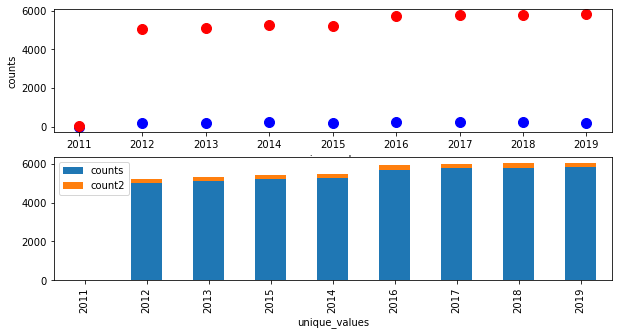

In [141]:
fig, ax = plt.subplots(2, 1,figsize=(10, 5))
rng = np.random.RandomState(0)
colors = rng.rand(9)
yearCount.plot.scatter(x='unique_values',y='counts',c='blue',s=100,ax=ax[0])
yearCount2.reset_index().plot.scatter(x='unique_values',y='counts',c='red',s=100,ax=ax[0])
yearCount2[['counts','count2']].plot(kind="bar", stacked=True,ax=ax[1])

In [151]:
ICDs = gdl['ICD'].value_counts().rename_axis('unique_values').reset_index(name='counts')
organs = gdl['Organ'].value_counts().rename_axis('unique_values').reset_index(name='counts')
new_col = organs['unique_values']
ICDs.insert(1, column='organ', value=new_col)
ICDs

,unique_values,organ,counts
0,C25,Pancreas,4703
1,C34,Lungs,4514
2,C61,Prostate,4424
3,C50,Breast,4247
4,C20,Colon and Rectum,3936
5,C16,Stomach,2665
6,C95,Leukemia,2635
7,C53,Cervix Uteri,2346
8,C22,Liver,2027
9,C96,Lymphoma,1724


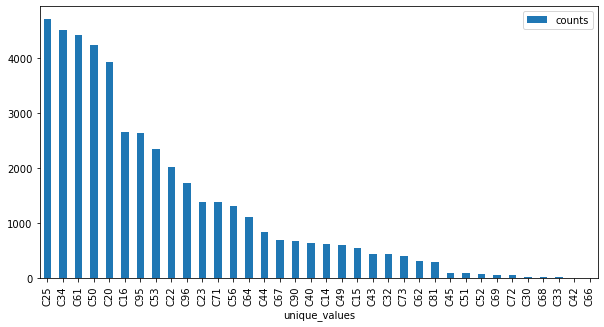

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
rng = np.random.RandomState(0)
ICDs.plot.bar(x='unique_values',y='counts',ax=ax)

In [165]:
gdl25 = gdl.loc[gdl["ICD"] == 'C25']
yearCount = gdl25.loc[gdl25["anio_ocur"] >= 2011]
yearCount = yearCount['anio_ocur'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount

,unique_values,counts
0,2018,730
1,2019,705
2,2017,659
3,2016,594
4,2015,548
5,2013,509
6,2014,490
7,2012,463


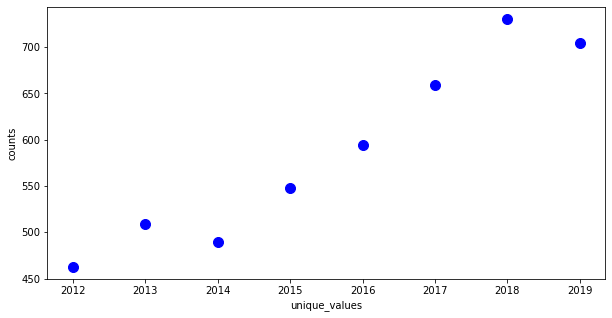

In [174]:
fig, ax = plt.subplots(figsize=(10, 5))
rng = np.random.RandomState(0)
colors = np.random.rand(len(yearCount))
yearCount.plot.scatter(x='unique_values',y='counts',c='blue',s=100,ax=ax)

In [63]:
#fig, ax = plt.subplots(figsize=(10, 5))
#ageCount = df['edad'].value_counts().rename_axis('unique_values').reset_index(name='counts')
#ageCount.hist(column='unique_values', bins=25, grid=False, color='#86bf91', zorder=2, rwidth=0.9, ax=ax)
#ageCount.hist(column='counts', bins=25, grid=False, color='red', zorder=2, rwidth=0.9, ax=ax)